<a href="https://colab.research.google.com/github/auspicious0/bike_buyers/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80_bike_buyers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://drive.google.com/file/d/1jG1BdFg3hrSqrRIWdJuLy_8y1zvIMPvJ/view?usp=sharing
#https://www.kaggle.com/datasets/heeraldedhia/bike-buyers
#자전거 구매자 정보를 바탕으로 자전거 사는 것에 대한 로지스틱 회귀를 수행하려 한다.
system("gdown --id 1jG1BdFg3hrSqrRIWdJuLy_8y1zvIMPvJ")
system("ls",TRUE)


[1] "bike_buyers.csv"             "depression_anxiety_data.csv"
[3] "sample_data"

In [ ]:
DF<-fread("bike_buyers.csv",header=T,encoding="UTF-8")%>%as_tibble()
DF%>%show()

# A tibble: 1,000 × 13
      ID `Marital Status` Gender   Income Children Education          Occupation
   <int> <chr>            <chr>     <int>    <int> <chr>              <chr>     
 1 12496 "Married"        "Female"  40000        1 Bachelors          Skilled M…
 2 24107 "Married"        "Male"    30000        3 Partial College    Clerical  
 3 14177 "Married"        "Male"    80000        5 Partial College    Professio…
 4 24381 "Single"         ""        70000        0 Bachelors          Professio…
 5 25597 "Single"         "Male"    30000        0 Bachelors          Clerical  
 6 13507 "Married"        "Female"  10000        2 Partial College    Manual    
 7 27974 "Single"         "Male"   160000        2 High School        Management
 8 19364 "Married"        "Male"    40000        1 Bachelors          Skilled M…
 9 22155 ""               "Male"    20000        2 Partial High Scho… Clerical  
10 19280 "Married"        "Male"       NA        2 Partial College    Manual    
# ℹ 9

In [ ]:
DF%>%str()

tibble [1,000 × 13] (S3: tbl_df/tbl/data.frame)
 $ ID              : int [1:1000] 12496 24107 14177 24381 25597 13507 27974 19364 22155 19280 ...
 $ Marital Status  : chr [1:1000] "Married" "Married" "Married" "Single" ...
 $ Gender          : chr [1:1000] "Female" "Male" "Male" "" ...
 $ Income          : int [1:1000] 40000 30000 80000 70000 30000 10000 160000 40000 20000 NA ...
 $ Children        : int [1:1000] 1 3 5 0 0 2 2 1 2 2 ...
 $ Education       : chr [1:1000] "Bachelors" "Partial College" "Partial College" "Bachelors" ...
 $ Occupation      : chr [1:1000] "Skilled Manual" "Clerical" "Professional" "Professional" ...
 $ Home Owner      : chr [1:1000] "Yes" "Yes" "No" "Yes" ...
 $ Cars            : int [1:1000] 0 1 2 1 0 0 4 0 2 1 ...
 $ Commute Distance: chr [1:1000] "0-1 Miles" "0-1 Miles" "2-5 Miles" "5-10 Miles" ...
 $ Region          : chr [1:1000] "Europe" "Europe" "Europe" "Pacific" ...
 $ Age             : int [1:1000] 42 43 60 41 36 50 33 43 58 NA ...
 $ Purchased Bik

In [ ]:
DF$`Marital Status` %>%unique()
DF$Gender %>% unique()
DF$Education %>% unique()
DF$Occupation %>% unique()
DF$`Home Owner` %>% unique()
DF$Region %>% unique()
DF$`Purchased Bike` %>% unique()


[1] "Married" "Single"  ""

[1] "Female" "Male"   ""

[1] "Bachelors"           "Partial College"     "High School"        
[4] "Partial High School" "Graduate Degree"

[1] "Skilled Manual" "Clerical"       "Professional"   "Manual"        
[5] "Management"

[1] "Yes" "No"  ""

[1] "Europe"        "Pacific"       "North America"

[1] "No"  "Yes"

위 값을 factor로 변경, id 값을 삭제


In [ ]:
DF<-select(DF,-ID)%>%
  mutate_at(c("Marital Status","Gender","Education","Occupation","Home Owner","Region","Purchased Bike"),factor)

In [ ]:

DF %>% str()
DF %>% show()


tibble [889 × 12] (S3: tbl_df/tbl/data.frame)
 $ Marital Status  : Factor w/ 2 levels "Married","Single": 1 1 1 2 1 1 1 1 2 2 ...
 $ Gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 2 1 2 2 1 ...
 $ Income          : int [1:889] 40000 30000 80000 30000 10000 40000 30000 40000 60000 10000 ...
 $ Children        : int [1:889] 1 3 5 0 2 1 3 2 1 2 ...
 $ Education       : Factor w/ 5 levels "Bachelors","Graduate Degree",..: 1 4 4 1 4 1 3 4 4 3 ...
 $ Occupation      : Factor w/ 5 levels "Clerical","Management",..: 5 1 4 1 3 5 5 1 5 3 ...
 $ Home Owner      : Factor w/ 2 levels "No","Yes": 2 2 1 1 2 2 1 2 1 2 ...
 $ Cars            : int [1:889] 0 1 2 0 0 0 2 1 1 1 ...
 $ Commute Distance: chr [1:889] "0-1 Miles" "0-1 Miles" "2-5 Miles" "0-1 Miles" ...
 $ Region          : Factor w/ 3 levels "Europe","North America",..: 1 1 1 1 1 1 3 1 3 1 ...
 $ Age             : int [1:889] 42 43 60 36 50 43 54 35 45 38 ...
 $ Purchased Bike  : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 2 2 2

 Marital Status    Gender        Income          Children   
        :  7          : 11   Min.   : 10000   Min.   :0.00  
 Married:535    Female:489   1st Qu.: 30000   1st Qu.:0.00  
 Single :458    Male  :500   Median : 60000   Median :2.00  
                             Mean   : 56268   Mean   :1.91  
                             3rd Qu.: 70000   3rd Qu.:3.00  
                             Max.   :170000   Max.   :5.00  
                             NA's   :6        NA's   :8     
               Education            Occupation  Home Owner      Cars      
 Bachelors          :306   Clerical      :177      :  4    Min.   :0.000  
 Graduate Degree    :174   Management    :173   No :314    1st Qu.:1.000  
 High School        :179   Manual        :119   Yes:682    Median :1.000  
 Partial College    :265   Professional  :276              Mean   :1.455  
 Partial High School: 76   Skilled Manual:255              3rd Qu.:2.000  
                                                           Max


FALSE  TRUE 
11969    31 

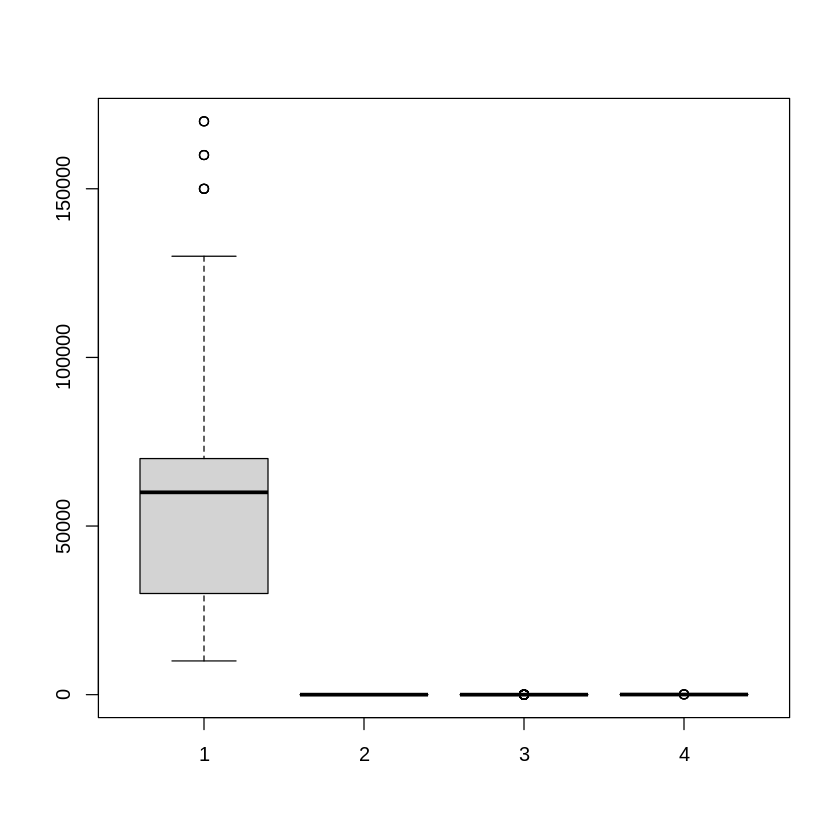

In [ ]:
#결측값 및 이상값 확인
DF %>% summary()
boxplot(DF$Income,DF$Children,DF$Cars,DF$Age)
table(is.na(DF))

전체 데이터 중 na는 매우 작은 양으로 삭제하도록 하겠습니다.
또 박스플롯 결과 이상값이 존재하므로 이상값 처리를 하겠습니다.

       ID        Marital Status        Gender              Income      
 Min.   :11000   Length:889         Length:889         Min.   : 10000  
 1st Qu.:15372   Class :character   Class :character   1st Qu.: 30000  
 Median :19889   Mode  :character   Mode  :character   Median : 50000  
 Mean   :20067                                         Mean   : 52137  
 3rd Qu.:24745                                         3rd Qu.: 70000  
 Max.   :29447                                         Max.   :130000  
    Children      Education          Occupation         Home Owner       
 Min.   :0.000   Length:889         Length:889         Length:889        
 1st Qu.:0.000   Class :character   Class :character   Class :character  
 Median :2.000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1.856                                                           
 3rd Qu.:3.000                                                           
 Max.   :5.000                                      


FALSE 
11557 

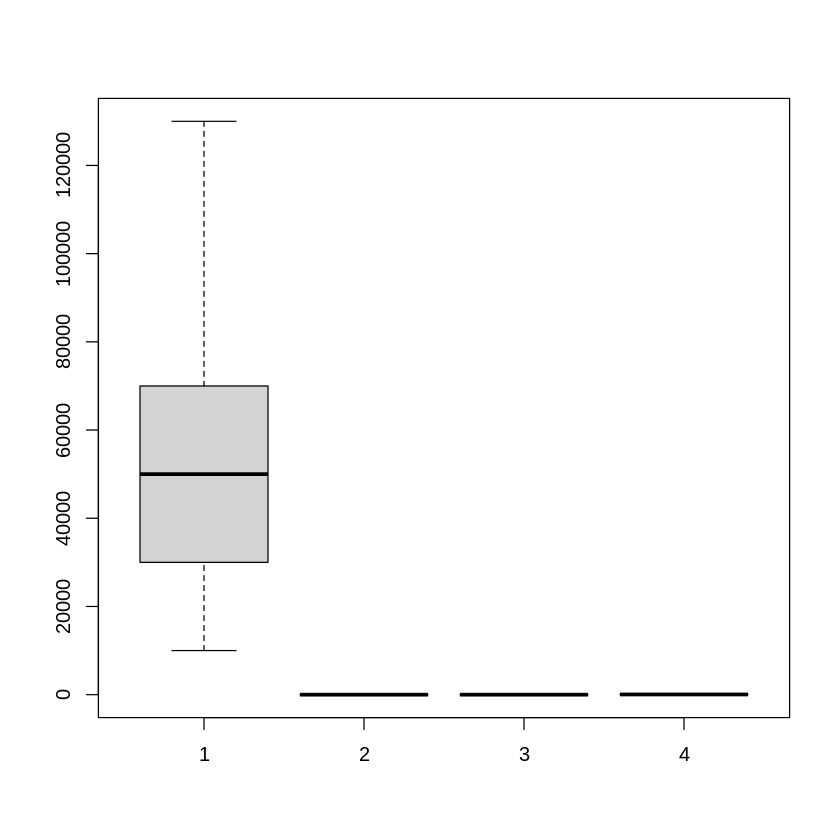

In [ ]:
DF <- na.omit(DF)

# 이상치 및 결측값 처리 함수
calculate_outliers <- function(data, column_name) {
  iqr_value <- IQR(data[[column_name]])
  upper_limit <- quantile(data[[column_name]], 0.75) + 1.5 * iqr_value
  lower_limit <- quantile(data[[column_name]], 0.25) - 1.5 * iqr_value

  data[[column_name]] <- ifelse(data[[column_name]] < lower_limit | data[[column_name]] > upper_limit, NA, data[[column_name]])

  return(data)
}
DF <- DF %>%
  mutate(
    `Marital Status` = ifelse(`Marital Status` == "", NA, as.character(`Marital Status`)),
    Gender = ifelse(Gender == "", NA, as.character(Gender)),
    `Home Owner` = ifelse(`Home Owner` == "", NA, as.character(`Home Owner`))
  ) %>%
  drop_na()
# 이상치 및 결측값 처리 및 결과에 대한 상자그림 그리기
DF <- calculate_outliers(DF, "Income")
DF <- calculate_outliers(DF, "Children")
DF <- calculate_outliers(DF, "Cars")
DF <- calculate_outliers(DF, "Age")
DF <- na.omit(DF)
boxplot(DF$Income,DF$Children,DF$Cars,DF$Age)

DF %>% summary()
table(is.na(DF))

숫자 데이터의 이상값 및 결측값 처리가 완료되었습니다.

In [ ]:
#카이제곱 검정을 통해 factor데이터와  연관관계를 분석
install.packages("gmodels")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’




In [ ]:
print("자전거(anxiousness)와 결혼(Marital Status)와의 연관관계 분석 ")
gmodels::CrossTable(DF$`Purchased Bike`,DF$`Marital Status`,chisq=T,expected=T,prop.r=F,prop.c=F)

[1] "자전거(anxiousness)와 결혼(Marital Status)와의 연관관계 분석 "

 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  889 

 
                    | DF$`Marital Status` 
DF$`Purchased Bike` |   Married |    Single | Row Total | 
--------------------|-----------|-----------|-----------|
                 No |       273 |       183 |       456 | 
                    |   246.209 |   209.791 |           | 
                    |     2.915 |     3.421 |           | 
                    |     0.307 |     0.206 |           | 
--------------------|-----------|-----------|-----------|
                Yes |       207 |       226 |       433 | 
                    |   233.791 |   199.209 |           | 
                    |     3.070 |     3.603 |           | 
                    |     0.233 |     0.254 |           | 
--------------------|------

결혼한 사람은 자전거를 구매하지 않고 결혼하지 않은 사람들은 자전거를 구매함이 명확히 보인다... 너무 행복하다.... 이게 바로 데이터 분석의 재미인가 너무 뭉클하기까지 하다.

In [ ]:
#Marital Status Gender          Commute Distance Purchased Bike
print("자전거(anxiousness)와 통근(Commute Distance)와의 연관관계 분석 ")
gmodels::CrossTable(DF$`Purchased Bike`,DF$`Commute Distance`,chisq=T,expected=T,prop.r=F,prop.c=F)

[1] "자전거(anxiousness)와 통근(Commute Distance)와의 연관관계 분석 "

 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  889 

 
                    | DF$`Commute Distance` 
DF$`Purchased Bike` |  0-1 Miles |  1-2 Miles |  10+ Miles |  2-5 Miles | 5-10 Miles |  Row Total | 
--------------------|------------|------------|------------|------------|------------|------------|
                 No |        136 |         82 |         67 |         62 |        109 |        456 | 
                    |    163.627 |     80.531 |     46.677 |     76.940 |     88.225 |            | 
                    |      4.664 |      0.027 |      8.848 |      2.901 |      4.892 |            | 
                    |      0.153 |      0.092 |      0.075 |      0.070 |      0.123 |            | 
--------------------|------------|------------|------------|-----

가까울 수록 자전거를 많이 사는 것은 보이지만 가까운 경우에 가장 많은 응답자가 있어서 신뢰할 수 있는 것 같지는 않다.


In [ ]:
#Marital Status Gender          Commute Distance Purchased Bike
print("자전거(anxiousness)와 성별(Gender)와의 연관관계 분석 ")
gmodels::CrossTable(DF$`Purchased Bike`,DF$Gender,chisq=T,expected=T,prop.r=F,prop.c=F)

[1] "자전거(anxiousness)와 성별(Gender)와의 연관관계 분석 "

 
   Cell Contents
|-------------------------|
|                       N |
|              Expected N |
| Chi-square contribution |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  889 

 
                    | DF$Gender 
DF$`Purchased Bike` |    Female |      Male | Row Total | 
--------------------|-----------|-----------|-----------|
                 No |       218 |       238 |       456 | 
                    |   225.692 |   230.308 |           | 
                    |     0.262 |     0.257 |           | 
                    |     0.245 |     0.268 |           | 
--------------------|-----------|-----------|-----------|
                Yes |       222 |       211 |       433 | 
                    |   214.308 |   218.692 |           | 
                    |     0.276 |     0.271 |           | 
                    |     0.250 |     0.237 |           | 
--------------------|-----------|-----------|

남자보다 여자가 더 자전거를 많이 타는 것으로 보인다. 하지만 그 수치가 유의미해 보이지는 않는다.


In [ ]:
#본격적인 로지스틱 회귀 분석을 위해 패키지를 설치한다. 데이터의 80페센트를 학습 데이터(train)
#나머지는 테스트 데이터(test)로 분리한다.
index<-caret::createDataPartition(y=DF$`Purchased Bike`,p=0.8,list=FALSE)
train<-DF[index,]
test<-DF[-index,]

train%>%show()
test%>%show()

# A tibble: 712 × 12
   `Marital Status` Gender Income Children Education     Occupation `Home Owner`
   <fct>            <fct>   <int>    <int> <fct>         <fct>      <fct>       
 1 Married          Female  40000        1 Bachelors     Skilled M… Yes         
 2 Married          Male    30000        3 Partial Coll… Clerical   Yes         
 3 Married          Male    80000        5 Partial Coll… Professio… No          
 4 Single           Male    30000        0 Bachelors     Clerical   No          
 5 Married          Female  10000        2 Partial Coll… Manual     Yes         
 6 Married          Male    40000        1 Bachelors     Skilled M… Yes         
 7 Married          Female  30000        3 High School   Skilled M… No          
 8 Married          Male    40000        2 Partial Coll… Clerical   Yes         
 9 Single           Male    60000        1 Partial Coll… Skilled M… No          
10 Single           Female  10000        2 High School   Manual     Yes         
# ℹ 702

In [ ]:
print("glm model m")

m <- glm(formula = `Purchased Bike` ~ ., data = train, family = "binomial")
summary(m)

[1] "glm model m"



Call:
glm(formula = `Purchased Bike` ~ ., family = "binomial", data = train)

Coefficients:
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -6.782e-01  5.645e-01  -1.201  0.22959    
`Marital Status`Single        8.222e-01  1.872e-01   4.393 1.12e-05 ***
GenderMale                    9.021e-03  1.657e-01   0.054  0.95658    
Income                        6.754e-06  5.288e-06   1.277  0.20152    
Children                     -1.362e-01  6.595e-02  -2.065  0.03897 *  
EducationGraduate Degree     -4.215e-01  2.624e-01  -1.607  0.10812    
EducationHigh School          2.274e-02  3.072e-01   0.074  0.94099    
EducationPartial College     -2.464e-01  2.621e-01  -0.940  0.34717    
EducationPartial High School -5.671e-01  4.389e-01  -1.292  0.19626    
OccupationManagement          1.784e-01  5.115e-01   0.349  0.72729    
OccupationManual             -1.138e-01  3.347e-01  -0.340  0.73376    
OccupationProfessional        8.442e-01  3.

로지스틱 회귀모형 m은 설명력이 좋은 여러개의 변수를 가지고 있는 것으로 보인다.  m 모델에서 backward 방식을 이용하여 필요 없는 설명변수를 제거하여 mback 모델을 만들고자 한다.


In [ ]:
print("backward model mback")
mback <- step(m, direction = "backward")

[1] "backward model mback"
Start:  AIC=917.31
`Purchased Bike` ~ `Marital Status` + Gender + Income + Children + 
    Education + Occupation + `Home Owner` + Cars + `Commute Distance` + 
    Region + Age

                     Df Deviance    AIC
- Education           4   878.60 914.60
- Gender              1   873.31 915.31
- Age                 1   874.36 916.36
- Income              1   874.94 916.94
<none>                    873.31 917.31
- Occupation          4   882.74 918.74
- Children            1   877.61 919.61
- `Home Owner`        1   878.81 920.81
- Cars                1   880.67 922.67
- Region              2   890.01 930.01
- `Marital Status`    1   893.22 935.22
- `Commute Distance`  4   903.16 939.16

Step:  AIC=914.6
`Purchased Bike` ~ `Marital Status` + Gender + Income + Children + 
    Occupation + `Home Owner` + Cars + `Commute Distance` + Region + 
    Age

                     Df Deviance    AIC
- Gender              1   878.63 912.63
- Income              1   879.

4개의 변수가 삭제되고 7개의 변수만이 남았다.

In [ ]:
summary(mback)


Call:
glm(formula = `Purchased Bike` ~ `Marital Status` + Children + 
    Occupation + `Home Owner` + Cars + `Commute Distance` + Region, 
    family = "binomial", data = train)

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -0.23913    0.27789  -0.861  0.38951    
`Marital Status`Single        0.77049    0.17880   4.309 1.64e-05 ***
Children                     -0.10710    0.05688  -1.883  0.05972 .  
OccupationManagement          0.70338    0.33827   2.079  0.03758 *  
OccupationManual             -0.28672    0.29181  -0.983  0.32583    
OccupationProfessional        1.21747    0.30794   3.954 7.70e-05 ***
OccupationSkilled Manual      0.46753    0.27927   1.674  0.09411 .  
`Home Owner`Yes               0.43953    0.20237   2.172  0.02986 *  
Cars                         -0.31742    0.10387  -3.056  0.00224 ** 
`Commute Distance`1-2 Miles  -0.44090    0.24037  -1.834  0.06662 .  
`Commute Distance`10+ Miles  -1.6207

mback 모델을 사용하여 test 데이터로 예측을 수행하여 보자.

In [ ]:
test%>%show()

# A tibble: 177 × 12
   `Marital Status` Gender Income Children Education     Occupation `Home Owner`
   <fct>            <fct>   <int>    <int> <fct>         <fct>      <fct>       
 1 Single           Male    30000        3 Partial Coll… Clerical   No          
 2 Single           Male    40000        2 Partial Coll… Clerical   Yes         
 3 Single           Male    40000        2 Partial Coll… Clerical   No          
 4 Married          Female  20000        2 Partial Coll… Manual     Yes         
 5 Single           Male    90000        5 Partial Coll… Professio… No          
 6 Single           Female  40000        2 Partial Coll… Skilled M… Yes         
 7 Single           Female  90000        4 High School   Management No          
 8 Married          Male    40000        0 Bachelors     Clerical   Yes         
 9 Married          Female  40000        1 Bachelors     Skilled M… Yes         
10 Married          Male    60000        2 Bachelors     Professio… Yes         
# ℹ 167

In [ ]:
predict_value <- predict(mback,test,type="response")%>%tibble(predict_value=.)

predict_value%>%show()

# A tibble: 177 × 1
   predict_value
           <dbl>
 1         0.523
 2         0.578
 3         0.500
 4         0.425
 5         0.585
 6         0.580
 7         0.202
 8         0.550
 9         0.637
10         0.833
# ℹ 167 more rows


In [ ]:
predict_check <- test %>%select(`Purchased Bike`) %>% dplyr::bind_cols(.,predict_value)
predict_check %>%show()

# A tibble: 177 × 2
   `Purchased Bike` predict_value
   <fct>                    <dbl>
 1 Yes                      0.523
 2 Yes                      0.578
 3 No                       0.500
 4 No                       0.425
 5 Yes                      0.585
 6 Yes                      0.580
 7 No                       0.202
 8 Yes                      0.550
 9 Yes                      0.637
10 Yes                      0.833
# ℹ 167 more rows


cutt off value를 ROC값으로 지정하기 위한 작업을 수행합니다.

In [ ]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Setting levels: control = No, case = Yes

Setting direction: controls < cases



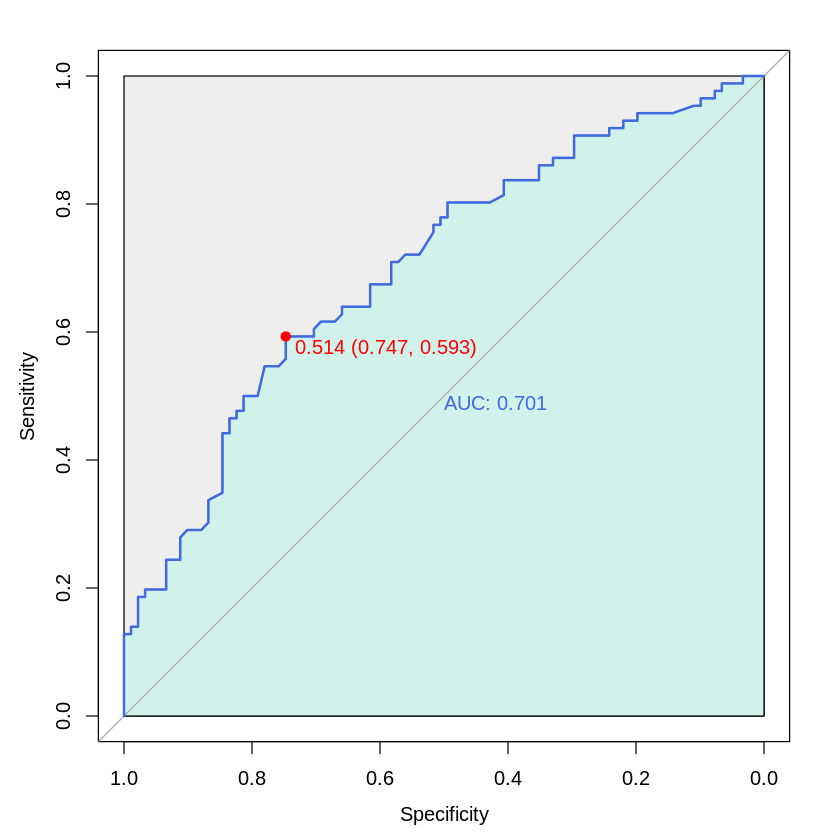

In [ ]:
roc_c <- pROC::roc(predict_check$`Purchased Bike`, predict_check$predict_value)
pROC::plot.roc(roc_c,
col="royalblue",
print.auc=TRUE,
max.auc.polygon=TRUE,
print.thres=TRUE, print.thres.pch=19, print.thres.col="red",
auc.polygon=TRUE,auc.polygon.col="#D1F2EB")

ROC곡선을 통해 알맞은 CUTT OFF값이 0.514인것으로 확인했습니다. CUT-OFF VALUE를 적용하여 predict_check에서 predict_biked를 설정하여 predict_cuttoff_roc에 저장하겠습니다.


In [ ]:
pROC::coords(roc_c,"best",ret="threshold",transpose=F)

threshold
<dbl>
0.5136439


In [ ]:
predict_cutoff_roc <-predict_check %>%
  mutate(predict_biked = as.factor(ifelse(predict_value >0.5136439,"Yes","No")))
predict_cutoff_roc

Purchased Bike,predict_value,predict_biked
<fct>,<dbl>,<fct>
Yes,0.5228698,Yes
Yes,0.5782981,Yes
No,0.4999350,No
No,0.4254288,No
Yes,0.5846695,Yes
Yes,0.5796278,Yes
No,0.2024137,No
Yes,0.5499326,Yes
Yes,0.6366437,Yes


좋은 예측력을 가진 것을 확인할 수 있습니다.마지막으로  predict_cutoff_roc`Purchased Bike`와

predict_cutoff_roc predict_Survived 사이의 관계를 혼돈

매트릭스를 통해 정확도 및 성능지표를 확인해 보겠습니다.

In [ ]:
caret::confusionMatrix(predict_cutoff_roc$`Purchased Bike`,predict_cutoff_roc$predict_biked)

Confusion Matrix and Statistics

          Reference
Prediction No Yes
       No  68  23
       Yes 35  51
                                          
               Accuracy : 0.6723          
                 95% CI : (0.5979, 0.7409)
    No Information Rate : 0.5819          
    P-Value [Acc > NIR] : 0.00849         
                                          
                  Kappa : 0.3416          
                                          
 Mcnemar's Test P-Value : 0.14863         
                                          
            Sensitivity : 0.6602          
            Specificity : 0.6892          
         Pos Pred Value : 0.7473          
         Neg Pred Value : 0.5930          
             Prevalence : 0.5819          
         Detection Rate : 0.3842          
   Detection Prevalence : 0.5141          
      Balanced Accuracy : 0.6747          
                                          
       'Positive' Class : No              
                                 

정확도 (Accuracy): 0.6723

전체 예측 중에서 올바르게 분류한 비율로, 0.6723 또는 67.23%입니다.(TP + TN) / (TP + TN + FP + FN)

민감도 (Sensitivity): 0.6602

실제 양성 중에서 올바르게 양성으로 분류된 비율로, 0.6602 또는 66.02%입니다.

특이도 (Specificity): 0.6892

실제 음성 중에서 올바르게 음성으로 분류된 비율로, 0.6892 또는 68.92%입니다.

정밀도 (Precision): 0.7473

정밀도는 모델이 양성으로 예측한 샘플 중에서 실제로 양성인 샘플의 비율을 나타냅니다. TP / (TP + FP)

재현율 (Recall): 0.6602

재현율은 실제로 양성인 샘플 중에서 모델이 양성으로 예측한 샘플의 비율을 나타냅니다. TP / (TP + FN)

따라서 자전거를 살 것인지 어느 정도 유의미한 예측을 할 수 있었습니다. 예측의 정도가 크지 않아 신뢰도가 높진 않지만 어떤 병원이나 심각한 자료 분석을 수행하는 경우가 아니기 때문에 참고 정도의 자료로 작용할 수 있을 것으로 보입니다.

